## Analysis of different materials for the pellet chute. 

Traces are raw IR beam readouts from a HARP - pico device in different IR light and pellet beam block conditions using black vs white material. Some hardware filtering has already been applied. These tests were conducted to fix overhead IR lights sometimes flooding the beam sensor when white pellet chutes are used, disrupting pellet counting.   

## Import libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import os

## Define paths

csv data paths

In [47]:
datafolder_white = r'D:\ProjectAeon\PatchTest\MaterialTest\White'
datafolder_black_form = r'D:\ProjectAeon\PatchTest\MaterialTest\Black_Form_Machine_Matt'
datafolder_black_750 = r'D:\ProjectAeon\PatchTest\MaterialTest\Black_750_Matt'
datafolder_black_fuse = r'D:\ProjectAeon\PatchTest\MaterialTest\Black_Fuse_Machine'

csv_files = {
    'White_LightsON_BlockingOFF' : datafolder_white + r'\\Collection2024_03_06_12_10_32\PicoMonitorOnLightNoBlockingNoCover.csv',
	'White_LightsON_BlockingON' : datafolder_white + r'\\Collection2024_03_06_12_11_46\PicoMonitorOnLightOnBlockingNoCover.csv',
    'White_LightsOFF_BlockingOFF' : datafolder_white + r'\\Collection2024_03_06_12_08_36\PicoMonitorNoLightNoBlockingNoCover.csv',
	'White_LightsOFF_BlockingON' : datafolder_white + r'\\Collection2024_03_06_12_14_03\PicoMonitorNoLightOnBlockingNoCover.csv',
    'Black_750_LightsON_BlockingOFF' : datafolder_black_750 + r'\\Collection2024_03_06_13_14_39\PicoMonitorOnLightNoBlockingNoCover.csv',
	'Black_750_LightsON_BlockingON' : datafolder_black_750 + r'\\Collection2024_03_06_13_16_15\PicoMonitorOnLightOnBlockingNoCover.csv',
    'Black_750_LightsOFF_BlockingOFF' : datafolder_black_750 + r'\\Collection2024_03_06_13_13_16\PicoMonitorNoLightNoBlockingNoCover.csv',
	'Black_750_LightsOFF_BlockingON' : datafolder_black_750 + r'\\Collection2024_03_06_13_18_08\PicoMonitorNoLightOnBlockingNoCover.csv',
    'Black_fuse_LightsON_BlockingOFF' : datafolder_black_fuse + r'\\Collection2024_03_06_14_00_24\pico_monitor_light_on_blocking_off_cover_off.csv',
    'Black_fuse_LightsON_BlockingON' : datafolder_black_fuse + r'\\Collection2024_03_06_13_57_35\pico_monitor_light_on_blocking_on_cover_off.csv',
    'Black_fuse_LightsOFF_BlockingOFF' : datafolder_black_fuse + r'\\Collection2024_03_06_13_59_54\pico_monitor_light_off_blocking_off_cover_off.csv',
    'Black_fuse_LightsOFF_BlockingON' : datafolder_black_fuse + r'\\Collection2024_03_06_13_59_21\pico_monitor_light_off_blocking_on_cover_off.csv',
    'Black_form_LightsON_BlockingOFF' : datafolder_black_form + r'\\Collection2024_03_13_13_31_42\pico_monitor_light_on_blocking_off_cover_off.csv',
    'Black_form_LightsON_BlockingON' : datafolder_black_form + r'\\Collection2024_03_13_13_33_25\pico_monitor_light_on_blocking_on_cover_off.csv',
    'Black_form_LightsOFF_BlockingOFF' : datafolder_black_form + r'\\Collection2024_03_13_13_30_54\pico_monitor_light_off_blocking_off_cover_off.csv',
    'Black_form_LightsOFF_BlockingON' : datafolder_black_form + r'\\Collection2024_03_13_13_34_45\pico_monitor_light_off_blocking_on_cover_off.csv',
    }


#'Black_form_LightsON_BlockingOFF' : datafolder_black_form + r'\\Collection2024_03_12_15_06_27\pico_monitor_light_on_blocking_off_cover_off.csv',
#'Black_form_LightsON_BlockingON' : datafolder_black_form + r'\\Collection2024_03_12_15_11_03\pico_monitor_light_on_blocking_on_cover_off.csv',
#'Black_form_LightsOFF_BlockingOFF' : datafolder_black_form + r'\\Collection2024_03_12_15_07_38\pico_monitor_light_off_blocking_off_cover_off.csv',
#'Black_form_LightsOFF_BlockingON' : datafolder_black_form + r'\\Collection2024_03_12_15_09_18\pico_monitor_light_off_blocking_on_cover_off.csv',

## Load csvs into a dictionary of dataframes
Dictionary keys by condition, each dataframe indexed by time (Seconds). All time series are zero-indexed from first timestamp of the trace

In [48]:
dataframes = {}

csv_files.items()
for condition, path in csv_files.items():
    dataframes[condition] = pd.read_csv(path)
    dataframes[condition].columns = ['Value','Seconds']
    first_timestamp = dataframes[condition]['Seconds'].iloc[0]
    dataframes[condition]['Seconds'] = dataframes[condition]['Seconds'] - first_timestamp
    dataframes[condition].set_index('Seconds', inplace=True)

In [18]:
list_of_keys = list(dataframes.keys())
list_of_keys[0]
dataframes[list_of_keys[0]]

,Value
Seconds,
0.000000,65455
0.005984,65535
0.009984,65535
0.013984,65535
0.016000,65535
...,...
42.737984,65535
42.737984,65535
42.737984,65535


In [24]:
dataframes['White_LightsON_BlockingOFF'].loc[start_time:start_time+timespan]

,Value
Seconds,
15.001984,65535
15.004000,65535
15.008000,65535
15.012000,65535
15.013984,65535
...,...
15.985984,65535
15.989984,65535
15.992000,65535


## Plot

Timespan parameter in seconds for plotting clarity

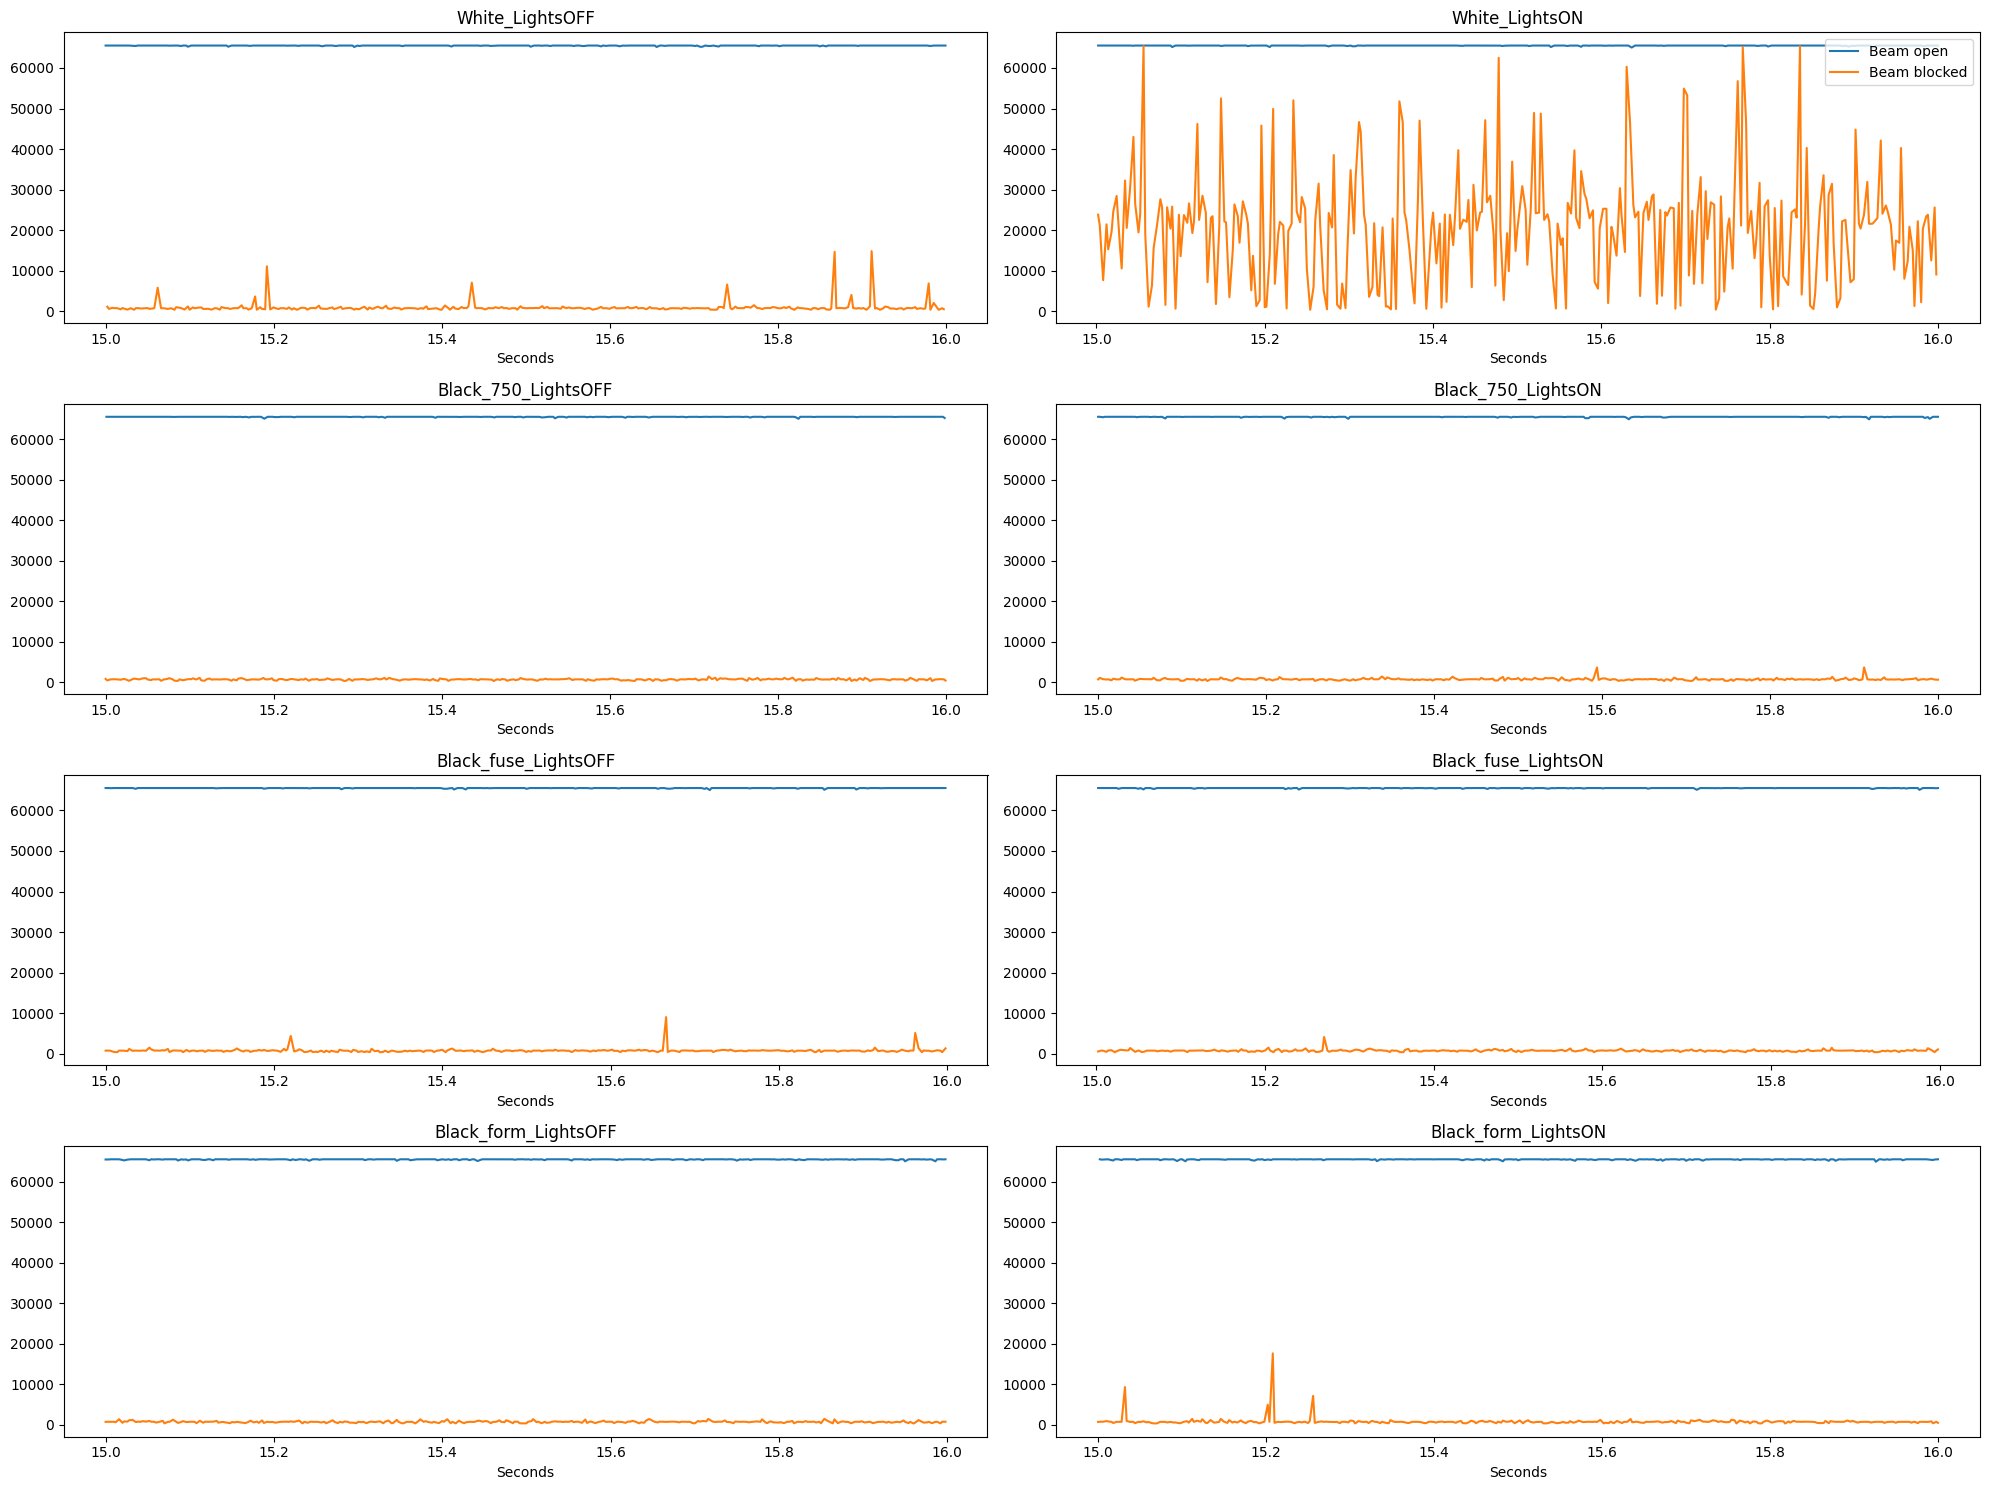

In [49]:
timespan = 1 # time span to plot in seconds
start_time = 15 # in seconds
# Create a 2x2 subplot grid
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

# Plot for White material
dataframes['White_LightsOFF_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[0, 0], label = 'Beam open')
dataframes['White_LightsOFF_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[0, 0], label = 'Beam blocked')
axs[0, 0].set_title('White_LightsOFF')
axs[0, 0].legend(['Beam open','Beam blocked'],loc = 'upper right')

# axs[0, 0].legend(loc = 'upper right')
dataframes['White_LightsON_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[0, 1], label = 'Beam open')
dataframes['White_LightsON_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[0, 1], label = 'Beam blocked')
axs[0, 1].set_title('White_LightsON')
axs[0, 1].legend(['Beam open','Beam blocked'],loc = 'upper right')

# Plot for Black material (750)
dataframes['Black_750_LightsOFF_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[1, 0],label = 'Beam open')
dataframes['Black_750_LightsOFF_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[1, 0],label = 'Beam blocked')
axs[1, 0].set_title('Black_750_LightsOFF')
# axs[1, 0].legend(['Beam open', 'Beam blocked'])

dataframes['Black_750_LightsON_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[1, 1],label = 'Beam open')
dataframes['Black_750_LightsON_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[1, 1],label = 'Beam blocked')
axs[1, 1].set_title('Black_750_LightsON')
# axs[1, 1].legend(['Beam open', 'Beam blocked'])

# Plot for Black material Fuse
dataframes['Black_fuse_LightsOFF_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[2, 0],label = 'Beam open')
dataframes['Black_fuse_LightsOFF_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[2, 0],label = 'Beam blocked')
axs[2, 0].set_title('Black_fuse_LightsOFF')
# axs[1, 0].legend(['Beam open', 'Beam blocked'])

dataframes['Black_fuse_LightsON_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[2, 1],label = 'Beam open')
dataframes['Black_fuse_LightsON_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[2, 1],label = 'Beam blocked')
axs[2, 1].set_title('Black_fuse_LightsON')

# Plot for Black material Form
dataframes['Black_form_LightsOFF_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[3, 0],label = 'Beam open')
dataframes['Black_form_LightsOFF_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[3, 0],label = 'Beam blocked')
axs[3, 0].set_title('Black_form_LightsOFF')
# axs[1, 0].legend(['Beam open', 'Beam blocked'])

dataframes['Black_form_LightsON_BlockingOFF'].loc[start_time:start_time+timespan].plot(ax=axs[3, 1],label = 'Beam open')
dataframes['Black_form_LightsON_BlockingON'].loc[start_time:start_time+timespan].plot(ax=axs[3, 1],label = 'Beam blocked')
axs[3, 1].set_title('Black_form_LightsON')        

# make all but top right legend invisible
for i, ax in enumerate(axs.flat):
    if i != 1:  
        ax.legend().set_visible(False)
plt.tight_layout()
plt.show()

## Basic descriptive stats functions

In [44]:
def compute_stats_snr(dataframes):

    stats = {}
    snr = {}
    for condition, df in dataframes.items():
    
        stats[condition] = df.describe()
        # Subtract baseline (estiamted as mean here) and compute SNR
        # df_bl_sub = df - df.min()  
        snr[condition] = df.mean()/df.std() 
    
    return stats, snr

def print_stats(stats, labels = ['Mean','Standard Deviation','Minimum', 'Maximum'],values = ['mean','std','min','max']):
    max_label_length = max(len(label) for label in labels)
    for condition, df_stats in stats.items():
        print(f'Stats for {condition}:')
        for label,value in zip(labels,values):
            print(f'{label : <{max_label_length}} : {df_stats.loc[value].Value}')
        print('\n')

def print_snr(stats): # not implemented; not quite right
    for condition, df_stats in stats.items():
        if condition[-3:] == 'OFF':
            beam = 'Beam Open'
        else:
            beam = 'Beam Blocked'

        print(f'{condition[0:15]}\t: {df_stats.Value} - ' + beam)

def print_var(dataframes): # variance
    for condition, df in dataframes.items():
        if condition[-3:] == 'OFF':
            beam = 'Beam Open'
        else:
            beam = 'Beam Blocked'
        cond = condition.rsplit(sep='_',maxsplit = 1)[0]
        print(f'{cond}\t: {df.var().Value} - ' + beam)

In [43]:
condition
cond = condition.rsplit(sep='_',maxsplit = 1)[0]
cond

'Black_form_LightsOFF'

In [30]:
df = dataframes[condition]
df_bl_sub = df - df.min() 
df_bl_sub.mean()
df.var()

Value    188040.25083
dtype: float64

## Print the stats

In [45]:
stats, snr = compute_stats_snr(dataframes)
print('Descriptive Statistics:\n')
print_stats(stats)
print('\n')
# print('Signal to Noise:\n')
# print_snr(snr)
print('Signal Variance:\n')
print_var(dataframes)

Descriptive Statistics:

Stats for White_LightsON_BlockingOFF:
Mean               : 65515.82355565469
Standard Deviation : 63.40891994515901
Minimum            : 64911.0
Maximum            : 65535.0


Stats for White_LightsON_BlockingON:
Mean               : 20661.373233898306
Standard Deviation : 13635.865610533581
Minimum            : 288.0
Maximum            : 65535.0


Stats for White_LightsOFF_BlockingOFF:
Mean               : 65514.110742996345
Standard Deviation : 68.69700550707236
Minimum            : 64863.0
Maximum            : 65535.0


Stats for White_LightsOFF_BlockingON:
Mean               : 928.9821196961275
Standard Deviation : 1728.3840018872847
Minimum            : 304.0
Maximum            : 42410.0


Stats for Black_750_LightsON_BlockingOFF:
Mean               : 65511.55197657394
Standard Deviation : 71.60817561333315
Minimum            : 64911.0
Maximum            : 65535.0


Stats for Black_750_LightsON_BlockingON:
Mean               : 798.9637022419204
Standard De